In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [42]:
df_train = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Smart Permium\train data.csv")

In [43]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,21:39.1,Poor,No,Weekly,House,2869
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,21:39.1,Average,Yes,Monthly,House,1483
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,21:39.2,Good,Yes,Weekly,House,567
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,21:39.2,Poor,Yes,Daily,Apartment,765
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,21:39.3,Poor,Yes,Weekly,House,2022


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   Age                   1032254 non-null  float64
 2   Gender                1048575 non-null  object 
 3   Annual Income         1009366 non-null  float64
 4   Marital Status        1032269 non-null  object 
 5   Number of Dependents  952871 non-null   float64
 6   Education Level       1048575 non-null  object 
 7   Occupation            735638 non-null   object 
 8   Health Score          983942 non-null   float64
 9   Location              1048575 non-null  object 
 10  Policy Type           1048575 non-null  object 
 11  Previous Claims       730583 non-null   float64
 12  Vehicle Age           1048570 non-null  float64
 13  Credit Score          928164 non-null   float64
 14  Insurance Duration    1048574 non-

In [45]:
# Removing id and policy start date since it has unique not relavant to perdict the permium amount (date also not in proper format)
df_train.drop(["id","Policy Start Date"], axis=1, inplace=True) 



In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1032254 non-null  float64
 1   Gender                1048575 non-null  object 
 2   Annual Income         1009366 non-null  float64
 3   Marital Status        1032269 non-null  object 
 4   Number of Dependents  952871 non-null   float64
 5   Education Level       1048575 non-null  object 
 6   Occupation            735638 non-null   object 
 7   Health Score          983942 non-null   float64
 8   Location              1048575 non-null  object 
 9   Policy Type           1048575 non-null  object 
 10  Previous Claims       730583 non-null   float64
 11  Vehicle Age           1048570 non-null  float64
 12  Credit Score          928164 non-null   float64
 13  Insurance Duration    1048574 non-null  float64
 14  Customer Feedback     980702 non-n

In [47]:
for i in df_train.columns:
    if df_train[i].isnull().sum() > 0:
        print(i, df_train[i].isnull().sum())

Age 16321
Annual Income 39209
Marital Status 16306
Number of Dependents 95704
Occupation 312937
Health Score 64633
Previous Claims 317992
Vehicle Age 5
Credit Score 120411
Insurance Duration 1
Customer Feedback 67873


In [48]:


# Null handling:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean()).astype(int)
df_train["Annual Income"] = df_train["Annual Income"].fillna(df_train["Annual Income"].median()).astype(int)
df_train["Marital Status"] = df_train["Marital Status"].apply(lambda i: np.random.choice(["Married", "Single", "Divorced"]) if pd.isnull(i) else i)
df_train["Number of Dependents"] = df_train["Number of Dependents"].fillna(0).astype(int)
df_train["Occupation"] = df_train.apply(lambda i: np.random.choice(["Employed", "Self-Employed","Unemployed"]) if pd.isnull(i["Occupation"]) else i["Occupation"], axis=1)
df_train["Health Score"] = df_train["Health Score"].fillna(df_train["Health Score"].mean()).astype(int)
df_train["Previous Claims"] = df_train["Previous Claims"].fillna(df_train["Previous Claims"].median()).astype(int)
df_train["Vehicle Age"] = df_train["Vehicle Age"].ffill().astype(int)
df_train["Credit Score"] = df_train["Credit Score"].fillna(df_train["Credit Score"].mean()).astype(int)
df_train["Insurance Duration"] = df_train["Insurance Duration"].ffill().astype(int)
df_train["Customer Feedback"] = df_train["Customer Feedback"].apply(lambda i : np.random.choice(["Good", "Poor", "Average"]) if pd.isnull(i) else i)



In [53]:
df_train[df_train.duplicated()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [52]:
#duplicates:
df_train.duplicated().sum()

np.int64(0)

In [51]:
df_train = df_train.drop_duplicates()

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Age                   1048574 non-null  int64 
 1   Gender                1048574 non-null  object
 2   Annual Income         1048574 non-null  int64 
 3   Marital Status        1048574 non-null  object
 4   Number of Dependents  1048574 non-null  int64 
 5   Education Level       1048574 non-null  object
 6   Occupation            1048574 non-null  object
 7   Health Score          1048574 non-null  int64 
 8   Location              1048574 non-null  object
 9   Policy Type           1048574 non-null  object
 10  Previous Claims       1048574 non-null  int64 
 11  Vehicle Age           1048574 non-null  int64 
 12  Credit Score          1048574 non-null  int64 
 13  Insurance Duration    1048574 non-null  int64 
 14  Customer Feedback     1048574 non-null  object
 15  Smo

In [54]:
for i in df_train.columns:
    print(i, df_train[i].skew(),df_train[i].kurtosis())
    

Age -0.011663233526547426 -1.1659080050710349


TypeError: could not convert string to float: 'Female'

In [55]:
for i in df_train.columns:
    if df_train[i].dtype != 'object':
        try:
            print(i, "Skew:", df_train[i].skew(), "Kurtosis:", df_train[i].kurtosis())
        except Exception as e:
            print(f"Could not process {i}: {e}")

Age Skew: -0.011663233526547426 Kurtosis: -1.1659080050710349
Annual Income Skew: 1.5216102921930956 Kurtosis: 2.0091511396502266
Number of Dependents Skew: 0.1325368392300705 Kurtosis: -1.3780136292233982
Health Score Skew: 0.29207850233236154 Kurtosis: -0.6404989139410002
Previous Claims Skew: 1.0869627164346896 Kurtosis: 2.370943080913757
Vehicle Age Skew: -0.02029224361354687 Kurtosis: -1.2058046422286288
Credit Score Skew: -0.11852730224553416 Kurtosis: -0.842625325829264
Insurance Duration Skew: -0.009419731301772602 Kurtosis: -1.2366520579318856
Premium Amount Skew: 1.2414661855739828 Kurtosis: 1.5208872965887972


In [56]:

#to check outliner
numerical_cols = df_train.select_dtypes(include=['int','float64']).columns


In [57]:
#to check outliner
def detect_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

In [58]:
#to check outliner
print("Outliner Detected")
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    print(f"\n Column :{col}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outlier values : \n{outliers}")
    print(f"Lower bound : {lower_bound:.2f}, Upper bound : {upper_bound:.2f}")

Outliner Detected

 Column :Age
Number of Outliers: 0
Outlier values : 
Series([], Name: Age, dtype: int64)
Lower bound : -4.50, Upper bound : 87.50

 Column :Annual Income
Number of Outliers: 61666
Outlier values : 
3          141855
7          127237
19         123751
29         131038
59         147020
            ...  
1048474    104868
1048514    116930
1048518    123414
1048560    101410
1048562    114433
Name: Annual Income, Length: 61666, dtype: int64
Lower bound : -44347.00, Upper bound : 96909.00

 Column :Number of Dependents
Number of Outliers: 0
Outlier values : 
Series([], Name: Number of Dependents, dtype: int64)
Lower bound : -4.50, Upper bound : 7.50

 Column :Health Score
Number of Outliers: 0
Outlier values : 
Series([], Name: Health Score, dtype: int64)
Lower bound : -9.50, Upper bound : 58.50

 Column :Previous Claims
Number of Outliers: 54220
Outlier values : 
41         3
56         3
63         3
70         3
105        4
          ..
1048518    3
1048525    3
1

In [59]:
for i in df_train.select_dtypes(include =["object"]):
        print(i,df_train[i].unique())

Gender ['Female' 'Male']
Marital Status ['Married' 'Divorced' 'Single']
Education Level ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation ['Self-Employed' np.str_('Unemployed') np.str_('Employed')]
Location ['Urban' 'Rural' 'Suburban']
Policy Type ['Premium' 'Comprehensive' 'Basic']
Customer Feedback ['Poor' 'Average' 'Good']
Smoking Status ['No' 'Yes']
Exercise Frequency ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type ['House' 'Apartment' 'Condo']


In [60]:
for col in df_train.select_dtypes(include=["object"]).columns:
    df_train[col] = df_train[col].astype(str).str.replace('"', '').str.strip()

In [61]:
for i in df_train.select_dtypes(include =["object"]):
        print(i,df_train[i].unique())

Gender ['Female' 'Male']
Marital Status ['Married' 'Divorced' 'Single']
Education Level ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation ['Self-Employed' 'Unemployed' 'Employed']
Location ['Urban' 'Rural' 'Suburban']
Policy Type ['Premium' 'Comprehensive' 'Basic']
Customer Feedback ['Poor' 'Average' 'Good']
Smoking Status ['No' 'Yes']
Exercise Frequency ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type ['House' 'Apartment' 'Condo']


In [62]:
#Label Encodert (converting object datatype to float)
le = LabelEncoder()
for i in df_train.select_dtypes(include =["object"]):
    df_train[i] = le.fit_transform(df_train[i])

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Age                   1048574 non-null  int64
 1   Gender                1048574 non-null  int64
 2   Annual Income         1048574 non-null  int64
 3   Marital Status        1048574 non-null  int64
 4   Number of Dependents  1048574 non-null  int64
 5   Education Level       1048574 non-null  int64
 6   Occupation            1048574 non-null  int64
 7   Health Score          1048574 non-null  int64
 8   Location              1048574 non-null  int64
 9   Policy Type           1048574 non-null  int64
 10  Previous Claims       1048574 non-null  int64
 11  Vehicle Age           1048574 non-null  int64
 12  Credit Score          1048574 non-null  int64
 13  Insurance Duration    1048574 non-null  int64
 14  Customer Feedback     1048574 non-null  int64
 15  Smoking Status      

In [65]:
df_train.head(20)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,0,10049,1,1,0,1,22,2,2,2,17,372,5,2,0,3,2,2869
1,39,0,31678,0,3,2,1,15,0,1,1,12,694,2,0,1,1,2,1483
2,23,1,25602,0,3,1,1,47,1,2,1,14,592,3,1,1,3,2,567
3,21,1,141855,1,2,0,2,10,0,0,1,0,367,1,2,1,0,0,765
4,21,1,39651,2,1,0,1,20,0,2,0,8,598,4,2,1,3,2,2022
5,29,1,45963,1,1,0,1,33,2,2,2,4,614,5,0,0,3,2,3202
6,41,1,40336,1,0,3,0,25,0,0,2,8,807,6,2,0,3,2,439
7,48,0,127237,0,2,1,0,5,1,1,1,11,398,5,0,0,2,1,111
8,21,1,1733,0,3,0,0,17,2,2,1,10,685,8,0,0,1,1,213
9,44,1,52447,1,2,2,0,20,2,1,1,9,635,3,2,0,0,1,64


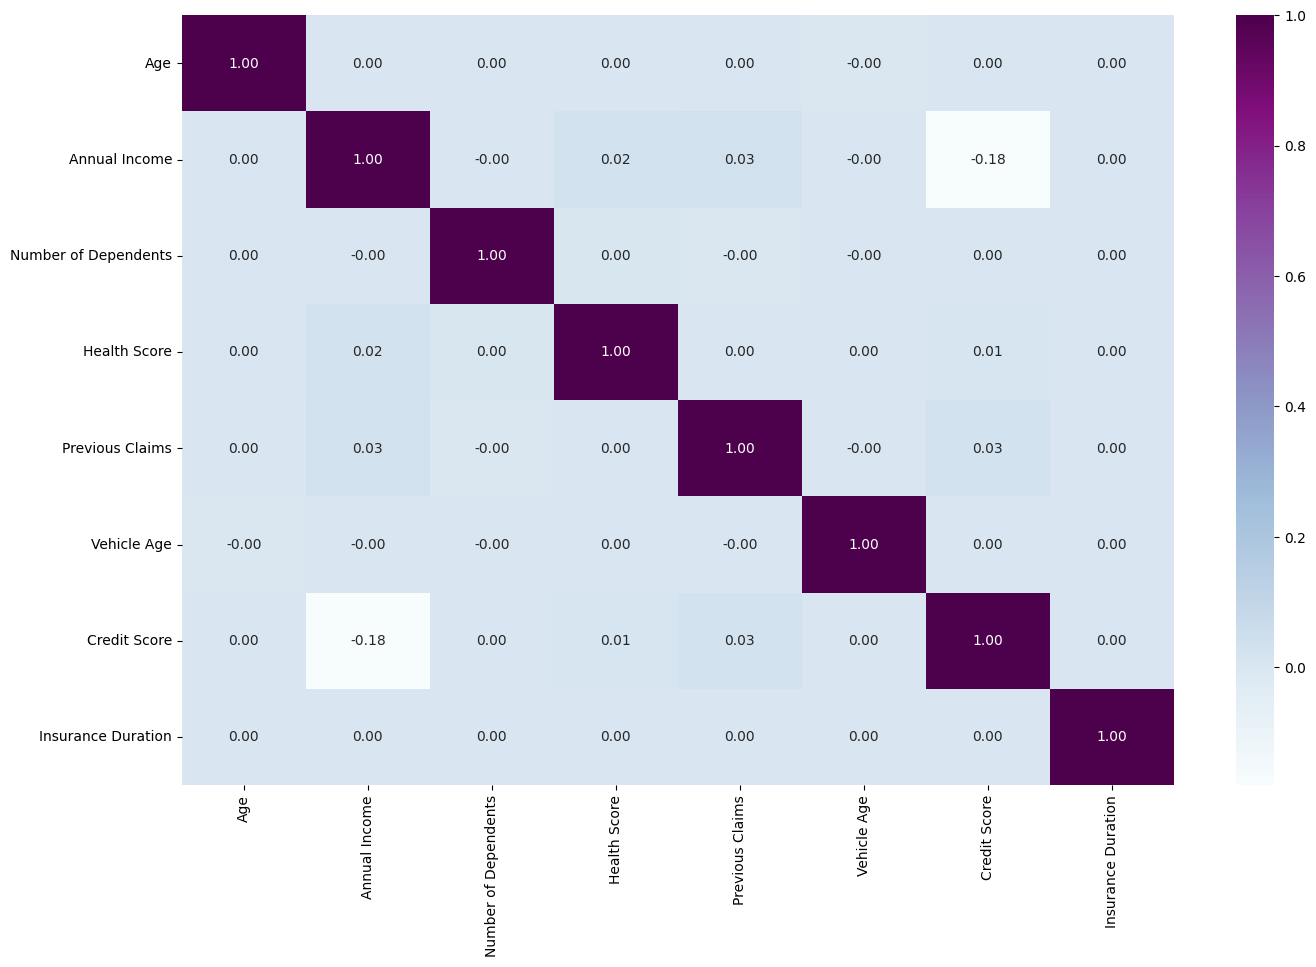

In [66]:
#corrleation
features = ['Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']
corr_1= df_train[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_1, annot=True, fmt = ".2f", cmap = "BuPu");

In [67]:
df_train.head(20)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,0,10049,1,1,0,1,22,2,2,2,17,372,5,2,0,3,2,2869
1,39,0,31678,0,3,2,1,15,0,1,1,12,694,2,0,1,1,2,1483
2,23,1,25602,0,3,1,1,47,1,2,1,14,592,3,1,1,3,2,567
3,21,1,141855,1,2,0,2,10,0,0,1,0,367,1,2,1,0,0,765
4,21,1,39651,2,1,0,1,20,0,2,0,8,598,4,2,1,3,2,2022
5,29,1,45963,1,1,0,1,33,2,2,2,4,614,5,0,0,3,2,3202
6,41,1,40336,1,0,3,0,25,0,0,2,8,807,6,2,0,3,2,439
7,48,0,127237,0,2,1,0,5,1,1,1,11,398,5,0,0,2,1,111
8,21,1,1733,0,3,0,0,17,2,2,1,10,685,8,0,0,1,1,213
9,44,1,52447,1,2,2,0,20,2,1,1,9,635,3,2,0,0,1,64


In [24]:
df_test = pd.read_csv(r"C:\Users\engga\OneDrive\Documents\Porkodi_guvi\Guvi_project\Streamlit\Smart Permium\test data.csv")

In [25]:
df_test.head(20)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,21:39.2,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,21:39.2,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,21:39.1,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,21:39.1,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,21:39.3,Average,No,Weekly,House
5,1200005,43.0,Male,52370.0,Married,2.0,Bachelor's,NaN,5.386224,Suburban,Basic,NaN,15.0,432.0,2.0,21:39.2,NaN,No,Rarely,Condo
6,1200006,21.0,Female,5896.0,Married,3.0,Master's,NaN,14.773963,Rural,Comprehensive,1.0,14.0,321.0,8.0,21:39.3,Good,No,Monthly,Condo
7,1200007,44.0,Male,31855.0,Divorced,3.0,Bachelor's,NaN,20.847900,Suburban,Premium,NaN,8.0,712.0,1.0,21:39.1,Poor,Yes,Monthly,Apartment
8,1200008,32.0,Female,76463.0,Divorced,4.0,PhD,NaN,22.988787,Suburban,Basic,0.0,1.0,540.0,2.0,21:39.2,Average,No,Weekly,Apartment
9,1200009,48.0,Female,27982.0,Married,2.0,High School,NaN,43.567433,Urban,Premium,1.0,15.0,757.0,7.0,21:39.1,Good,Yes,Daily,House


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   800000 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         800000 non-null  int64  
 3   Marital Status        800000 non-null  object 
 4   Number of Dependents  800000 non-null  int64  
 5   Education Level       800000 non-null  object 
 6   Occupation            800000 non-null  object 
 7   Health Score          800000 non-null  int64  
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       800000 non-null  int64  
 11  Vehicle Age           800000 non-null  int64  
 12  Credit Score          800000 non-null  int64  
 13  Insurance Duration    800000 non-null  int64  
 14  Customer Feedback     800000 non-null  object 
 15  

In [27]:
# Removing id and policy start date since it has unique not relavant to perdict the permium amount (date also not in proper format)
df_test.drop(["id","Policy Start Date"], axis=1, inplace=True) 

In [28]:
for i in df_test.columns:
    if df_test[i].isnull().sum() > 0:
        print(i, df_test[i].isnull().sum())

Age 12489
Annual Income 29860
Marital Status 12336
Number of Dependents 73130
Occupation 239125
Health Score 49449
Previous Claims 242802
Vehicle Age 3
Credit Score 91451
Insurance Duration 2
Customer Feedback 52276


In [31]:
# Null handling:

df_test["Age"] = df_test.groupby(["Gender", "Marital Status", "Number of Dependents"])["Age"]\
.transform(lambda x: x.fillna(x.mean()))
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Annual Income"] = df_test["Annual Income"].fillna(df_test["Annual Income"].median()).astype(int)
df_test["Marital Status"] = df_test["Marital Status"].apply(lambda i: np.random.choice(["Married", "Single", "Divorced"]) if pd.isnull(i) else i)
df_test["Number of Dependents"] = df_test["Number of Dependents"].fillna(0).astype(int)
df_test["Occupation"] = df_test.apply(lambda i: np.random.choice(["Employed", "Self-Employed","Unemployed"]) if pd.isnull(i["Occupation"]) else i["Occupation"], axis=1)
df_test["Health Score"] = df_test["Health Score"].fillna(df_test["Health Score"].mean()).astype(int)
df_test["Previous Claims"] = df_test["Previous Claims"].fillna(df_test["Previous Claims"].median()).astype(int)
df_test["Vehicle Age"]=df_test["Vehicle Age"].ffill().astype(int)
df_test["Credit Score"] = df_test["Credit Score"].fillna(df_test["Credit Score"].mean()).astype(int)
df_test["Insurance Duration"] = df_test["Insurance Duration"].ffill().astype(int)
df_test["Customer Feedback"]=df_test["Customer Feedback"].apply(lambda i : np.random.choice(["Good","Poor","Average"] )if pd.isnull(i) else i)

In [33]:
df_test.duplicated().sum()

np.int64(0)

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   800000 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         800000 non-null  int64  
 3   Marital Status        800000 non-null  object 
 4   Number of Dependents  800000 non-null  int64  
 5   Education Level       800000 non-null  object 
 6   Occupation            800000 non-null  object 
 7   Health Score          800000 non-null  int64  
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       800000 non-null  int64  
 11  Vehicle Age           800000 non-null  int64  
 12  Credit Score          800000 non-null  int64  
 13  Insurance Duration    800000 non-null  int64  
 14  Customer Feedback     800000 non-null  object 
 15  

In [69]:
le = LabelEncoder()
for i in df_train.select_dtypes(include = "object"):
    df_train[i] = le.fit_transform(df_train[i])
    

In [ ]:
for i in df_train.columns:
    print(i,df_train[i].unique())

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048574 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Age                   1048574 non-null  int64
 1   Gender                1048574 non-null  int64
 2   Annual Income         1048574 non-null  int64
 3   Marital Status        1048574 non-null  int64
 4   Number of Dependents  1048574 non-null  int64
 5   Education Level       1048574 non-null  int64
 6   Occupation            1048574 non-null  int64
 7   Health Score          1048574 non-null  int64
 8   Location              1048574 non-null  int64
 9   Policy Type           1048574 non-null  int64
 10  Previous Claims       1048574 non-null  int64
 11  Vehicle Age           1048574 non-null  int64
 12  Credit Score          1048574 non-null  int64
 13  Insurance Duration    1048574 non-null  int64
 14  Customer Feedback     1048574 non-null  int64
 15  Smoking Status      

In [71]:
df_train.head(10)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19,0,10049,1,1,0,1,22,2,2,2,17,372,5,2,0,3,2,2869
1,39,0,31678,0,3,2,1,15,0,1,1,12,694,2,0,1,1,2,1483
2,23,1,25602,0,3,1,1,47,1,2,1,14,592,3,1,1,3,2,567
3,21,1,141855,1,2,0,2,10,0,0,1,0,367,1,2,1,0,0,765
4,21,1,39651,2,1,0,1,20,0,2,0,8,598,4,2,1,3,2,2022
5,29,1,45963,1,1,0,1,33,2,2,2,4,614,5,0,0,3,2,3202
6,41,1,40336,1,0,3,0,25,0,0,2,8,807,6,2,0,3,2,439
7,48,0,127237,0,2,1,0,5,1,1,1,11,398,5,0,0,2,1,111
8,21,1,1733,0,3,0,0,17,2,2,1,10,685,8,0,0,1,1,213
9,44,1,52447,1,2,2,0,20,2,1,1,9,635,3,2,0,0,1,64


In [73]:
x= df_train.drop(["Premium Amount"],axis=1)


In [74]:
x.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19,0,10049,1,1,0,1,22,2,2,2,17,372,5,2,0,3,2
1,39,0,31678,0,3,2,1,15,0,1,1,12,694,2,0,1,1,2
2,23,1,25602,0,3,1,1,47,1,2,1,14,592,3,1,1,3,2
3,21,1,141855,1,2,0,2,10,0,0,1,0,367,1,2,1,0,0
4,21,1,39651,2,1,0,1,20,0,2,0,8,598,4,2,1,3,2


In [75]:
y=df_train["Premium Amount"]

In [76]:
y.head()

0    2869
1    1483
2     567
3     765
4    2022
Name: Premium Amount, dtype: int64

In [77]:
# Spliting the data for test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05)

In [78]:
print(x.shape,x_train.shape,x_test.shape)

(1048574, 18) (996145, 18) (52429, 18)


In [79]:
print(y.shape,y_train.shape,y_test.shape)

(1048574,) (996145,) (52429,)


In [85]:
#Train the model : RandomForest
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor( n_estimators=500, max_depth=7,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=42)
model1.fit(x_train,y_train)
print("Model training complete.")

Model training complete.


In [86]:
#prediciting values with test data
y_pred = model1.predict(x_test)

In [87]:
# Evaluating the model using RandomForest
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2_score = ",r2_score(y_test,y_pred),"MSE = ",mean_squared_error(y_test,y_pred),"MAE = ",mean_absolute_error(y_test,y_pred))

R2_score =  0.017046481097452104 MSE =  742405.300541648 MAE =  663.633546336947


In [49]:
#Train the model : GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor().fit(x_train,y_train)
print("Model training complete.")

Model training complete.


In [50]:
y_pred = model2.predict(x_test)

In [51]:
# Evaluating the model using GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2_score = ",r2_score(y_test,y_pred),"MSE = ",mean_squared_error(y_test,y_pred),"MAE = ",mean_absolute_error(y_test,y_pred))

R2_score =  0.02509925371451638 MSE =  726084.5135614567 MAE =  656.7530782166922


In [52]:

from sklearn.ensemble import AdaBoostRegressor
model3 = AdaBoostRegressor().fit(x_train,y_train)
y_pred = model3.predict(x_test)
print("R2_score = ",r2_score(y_test,y_pred),"MSE = ",mean_squared_error(y_test,y_pred),"MAE = ",mean_absolute_error(y_test,y_pred))

R2_score =  -0.13035563924654503 MSE =  841863.8795804539 MAE =  770.4093231168215


In [53]:
from xgboost import XGBRegressor
model4 = XGBRegressor().fit(x_train,y_train)
y_pred = model4.predict(x_test)
print("R2_score = ",r2_score(y_test,y_pred),"MSE = ",mean_squared_error(y_test,y_pred),"MAE = ",mean_absolute_error(y_test,y_pred))

R2_score =  0.03357309103012085 MSE =  719773.375 MAE =  648.0999145507812


In [ ]:
from sklearn.svm import SVR
model5 = SVR().fit(x_train,y_train)
y_pred = model5.predict(x_test)
print("R2_score = ",r2_score(y_test,y_pred),"MSE = ",mean_squared_error(y_test,y_pred),"MAE = ",mean_absolute_error(y_test,y_pred))

In [ ]:
#Age	Gender	Annual Income	Marital Status	Number of Dependents	Education Level	Occupation	Health Score	Location	Policy Type	Previous Claims	Vehicle Age	Credit Score	Insurance Duration	Customer Feedback	Smoking Status	Exercise Frequency	Property Type

In [91]:
input_values = [[35, 1, 75000, 1, 2, 2, 4, 80, 1, 0, 1, 3, 700, 5, 2, 0, 1, 0]]

In [ ]:
input_df = pd.DataFrame(input_values)
input_df.columns = x_train.columns  
predicted_premium = model1.predict(input_df)
print("Predicted Premium Amount:", round(predicted_premium[0]))

Predicted Premium Amount: 1111
